Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_h = pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/Heart Failure Prediction/heart_failure_clinical_records_dataset.csv")

In [3]:
df_h

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Basic Informations

In [4]:
def basic_info(data):
    print("Dataset size is: ", data.size)
    print("Dataset shape is: ", data.shape)
    print("Dataset dimensions is: ", data.ndim)
    print("Dataset columns are: ", data.columns)
    print(data.info())
    cat, num = list(), list()
    for i in data.columns:
        if data[i].dtype == object:
            cat.append(i)
        else:
            num.append(i)
    print("Categotical columns are: ", cat)
    print("Numerical columns are: ", num)
    
    return cat, num

In [5]:
categorical1, numerical1 = basic_info(df_h)

Dataset size is:  3887
Dataset shape is:  (299, 13)
Dataset dimensions is:  2
Dataset columns are:  Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8

In [6]:
df_h.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

this is good for us since there are no null values present

# General Exploration

#### Lets see the correlation b/w all the values

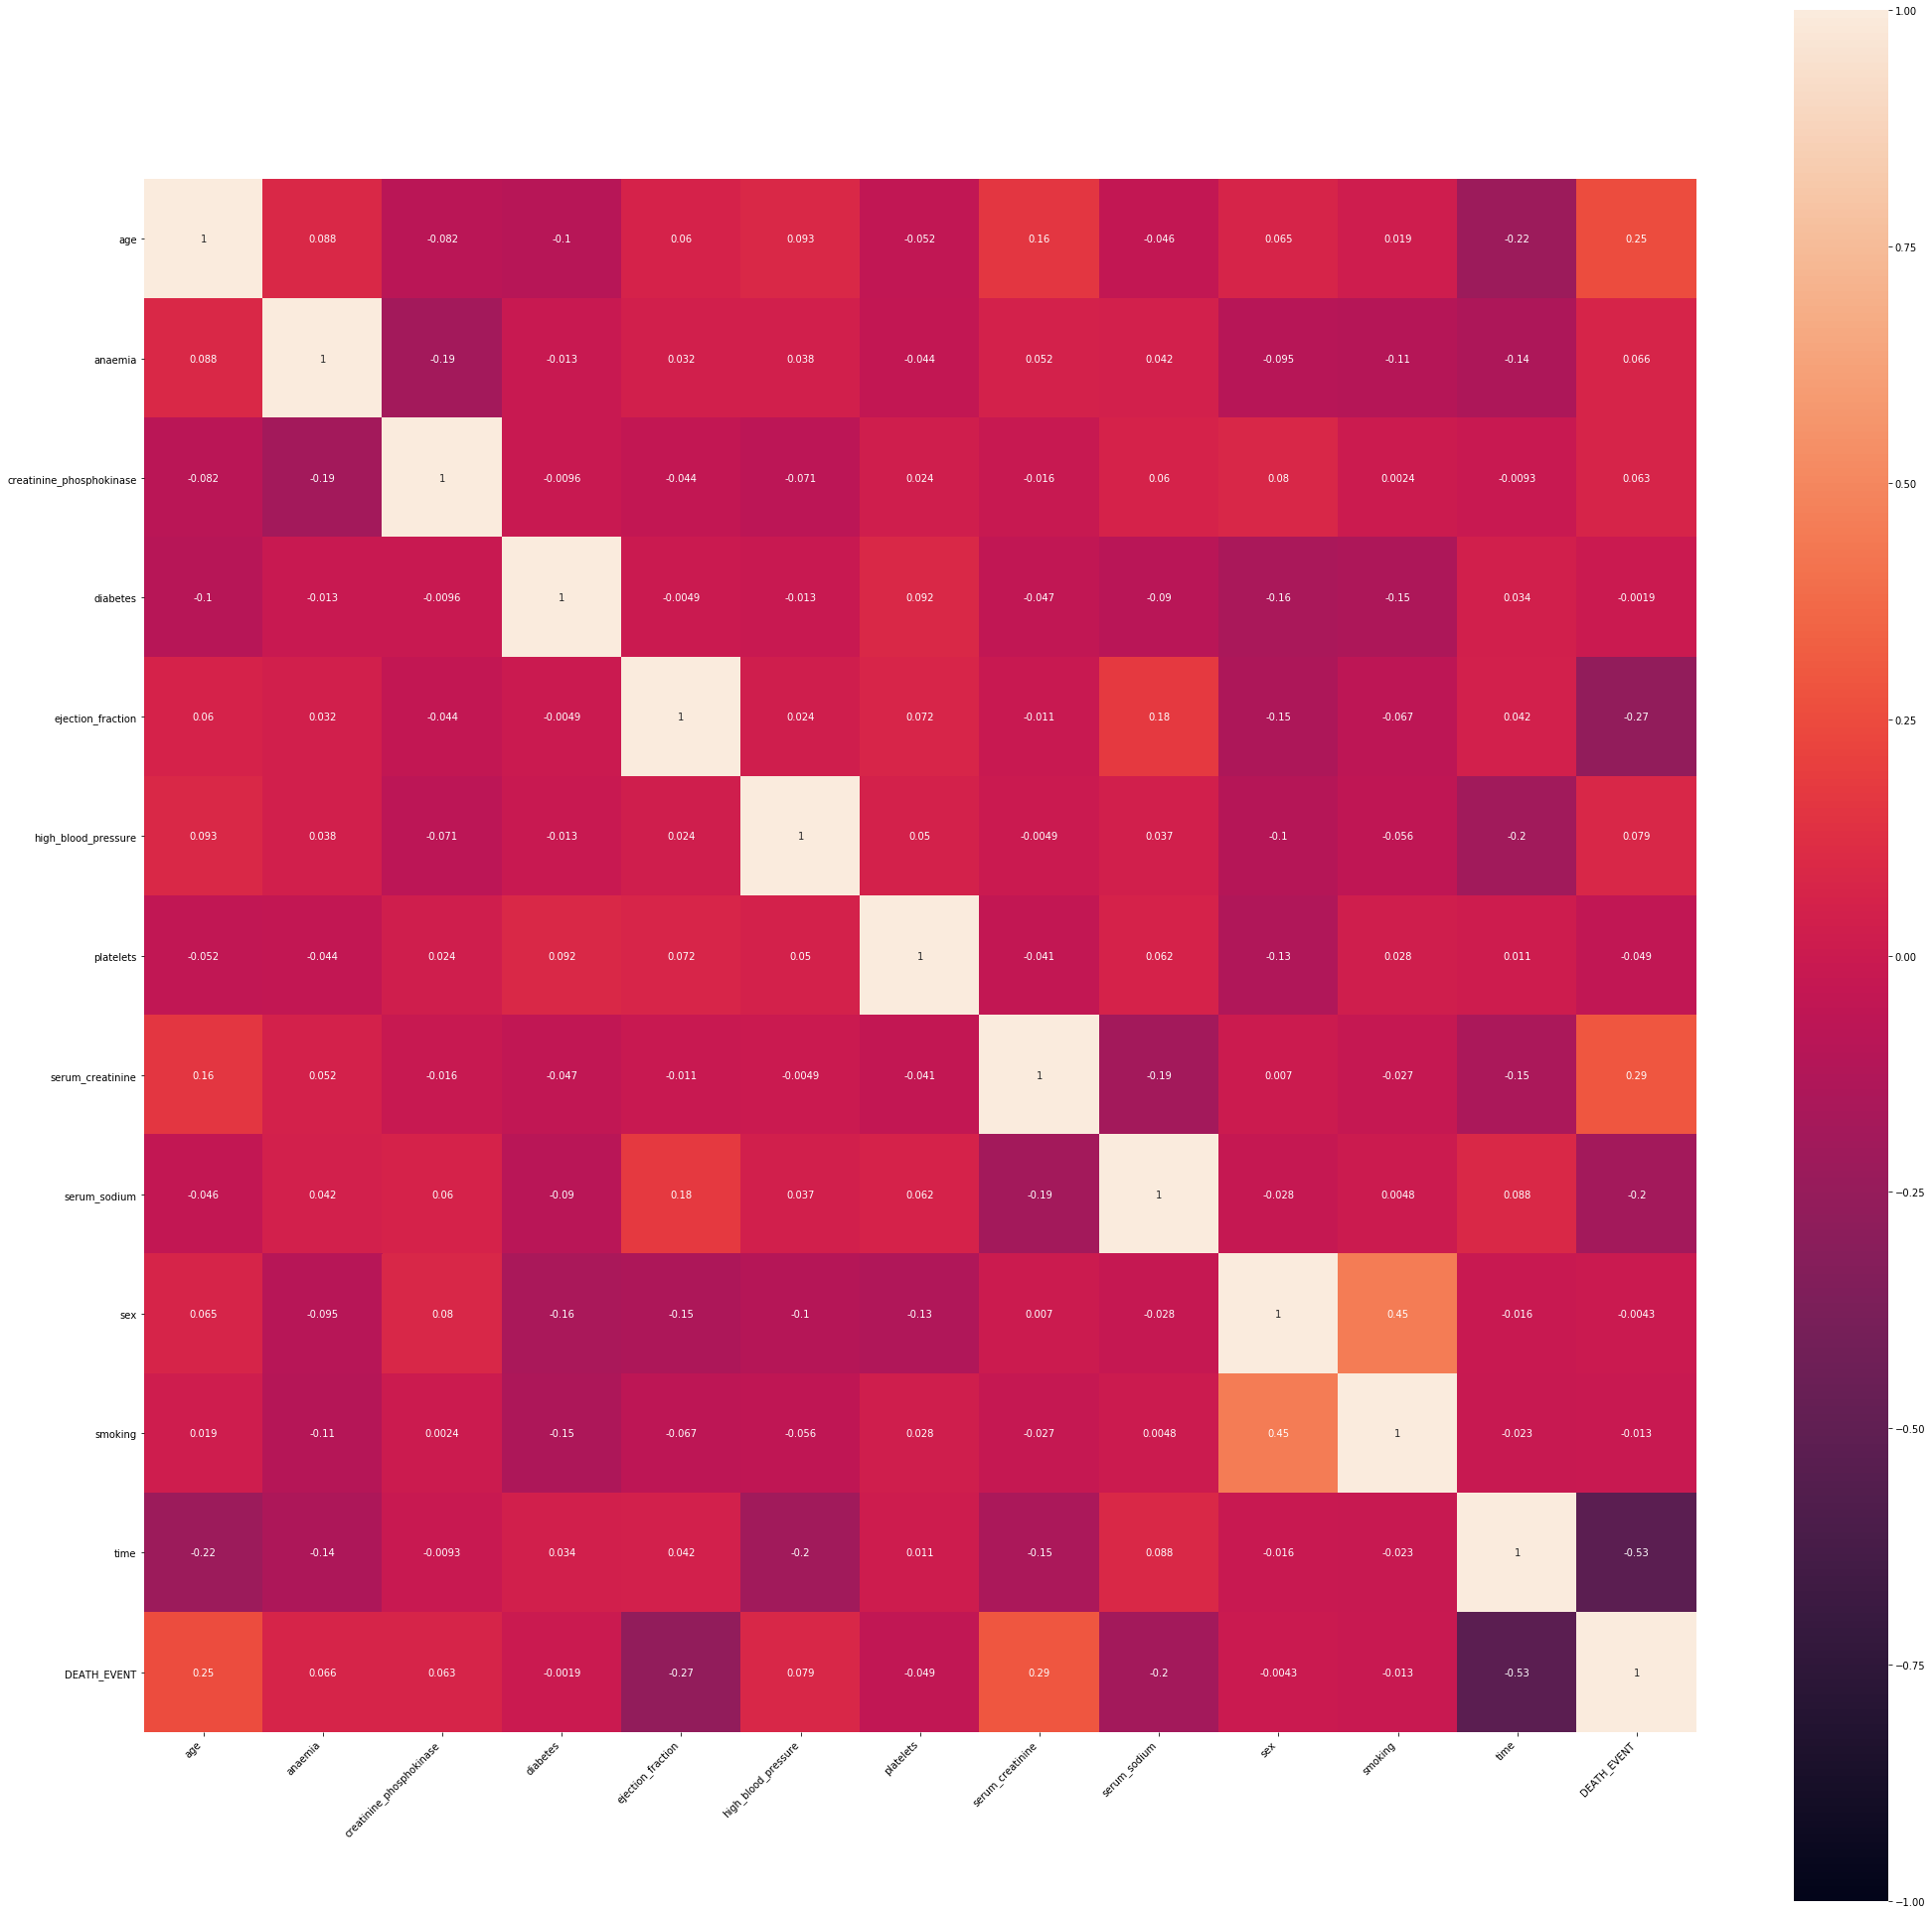

In [7]:
corr = df_h.corr()
plt.figure(figsize=(35,35))
ax= sns.heatmap(corr, vmin = -1, vmax = 1, square = True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize=10)
plt.show()

We see that only age, anameia, creatinine_phosphokinase, high_blood_pressure, serum_creatinine hvae +ve correlation with death_event

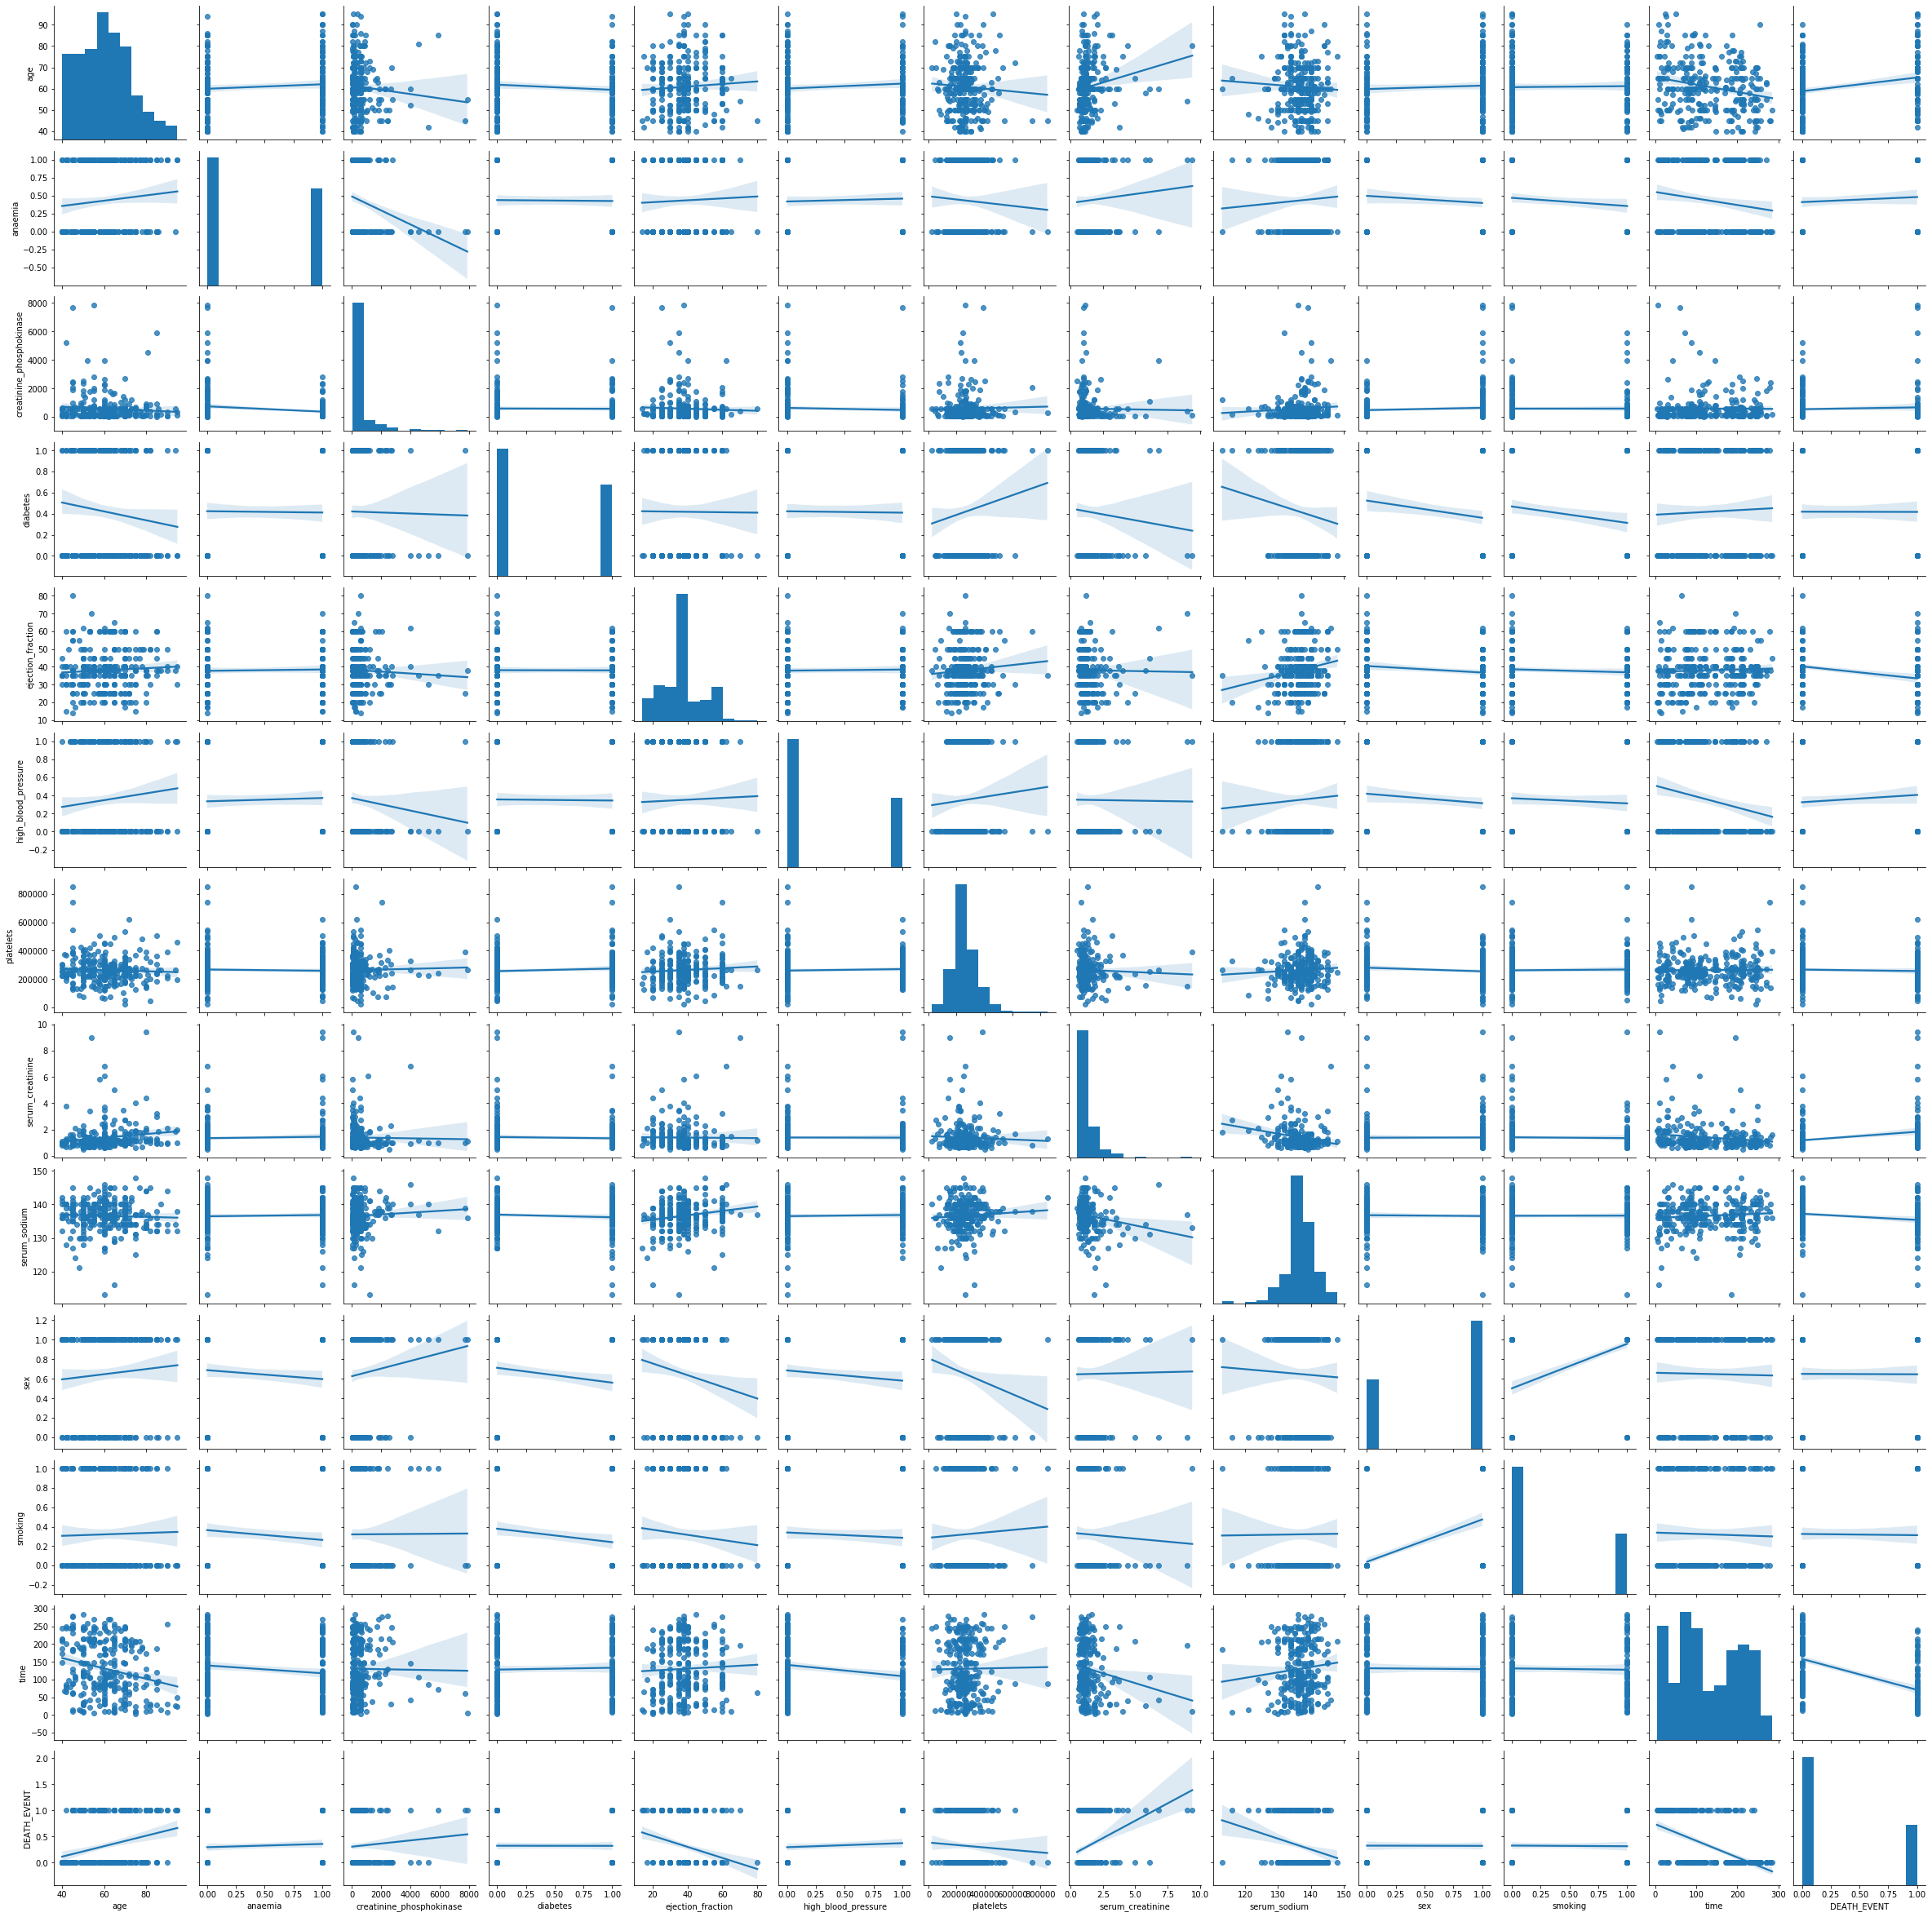

In [8]:
sns.pairplot(df_h, kind = 'reg')

Columns which i will be taking for model makinh are:
age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time

### age

In [9]:
df_h['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
62.000     5
68.000     5
52.000     5
49.000     4
61.000     4
51.000     4
73.000     4
59.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
95.000     2
48.000     2
60.667     2
67.000     2
44.000     2
66.000     2
77.000     2
78.000     2
54.000     2
57.000     2
94.000     1
56.000     1
41.000     1
87.000     1
79.000     1
86.000     1
43.000     1
81.000     1
47.000     1
Name: age, dtype: int64

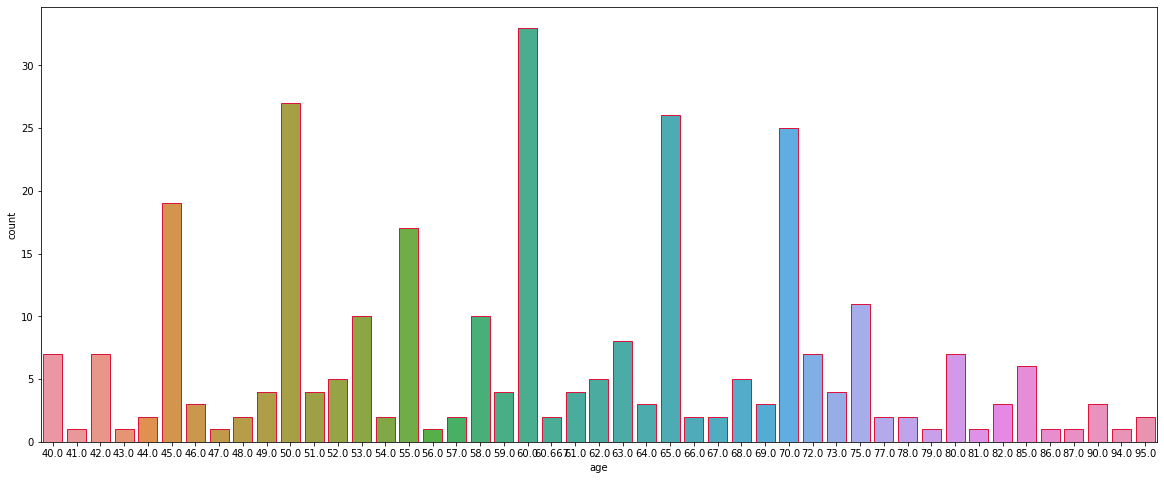

In [10]:
plt.figure(figsize = (20,8))
sns.countplot(df_h['age'], edgecolor = '#DC143C')
plt.show()

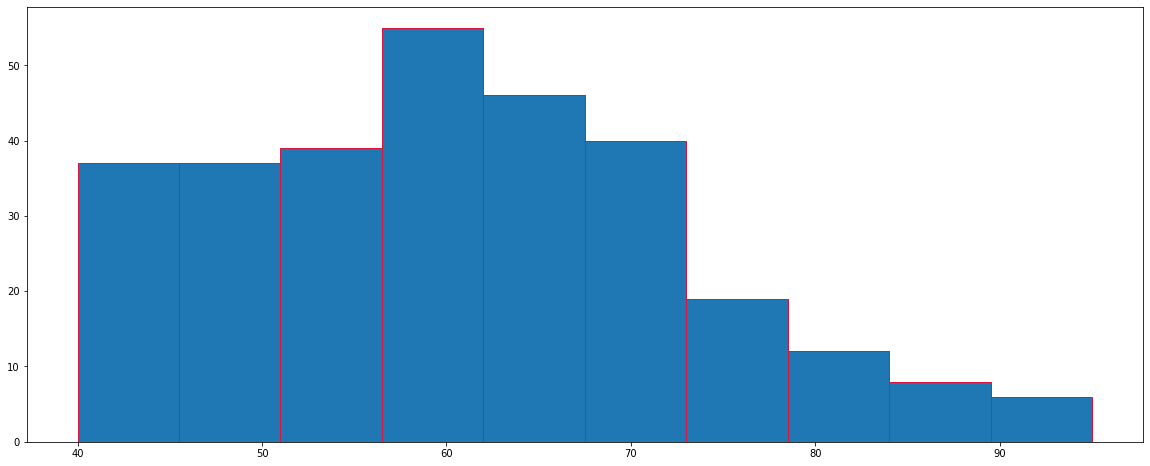

In [11]:
plt.figure(figsize = (20,8))
plt.hist(df_h['age'], edgecolor = '#DC143C')
plt.show()

### anaemia 

In [12]:
df_h['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

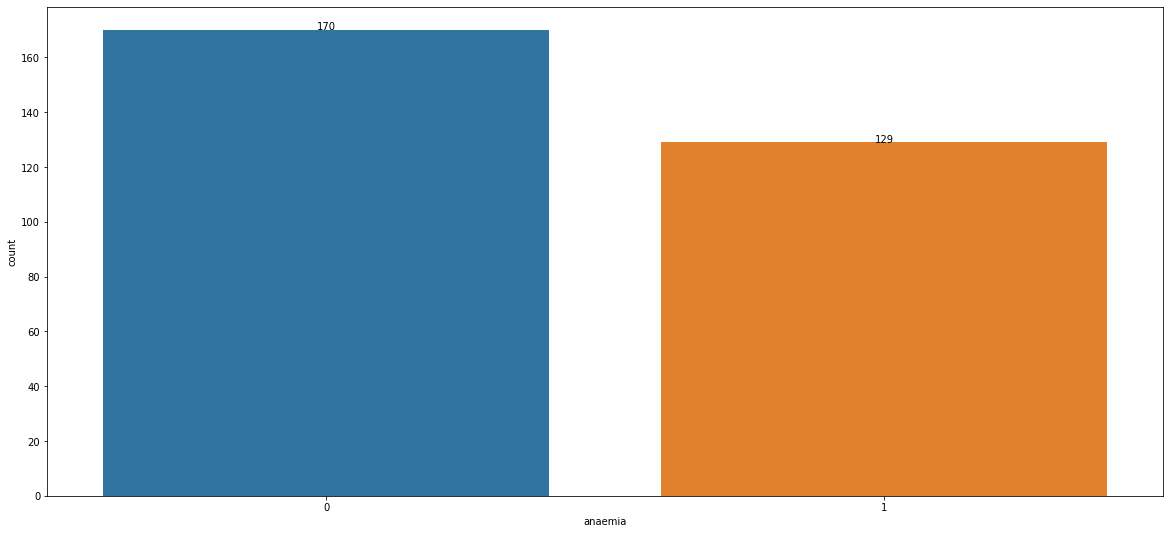

In [13]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_h['anaemia'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df_h['anaemia'].value_counts()[i],ha="center")
    i += 1
#plt.legend()
plt.show()

#### lets see anemia wrt to sex and wrt death_event

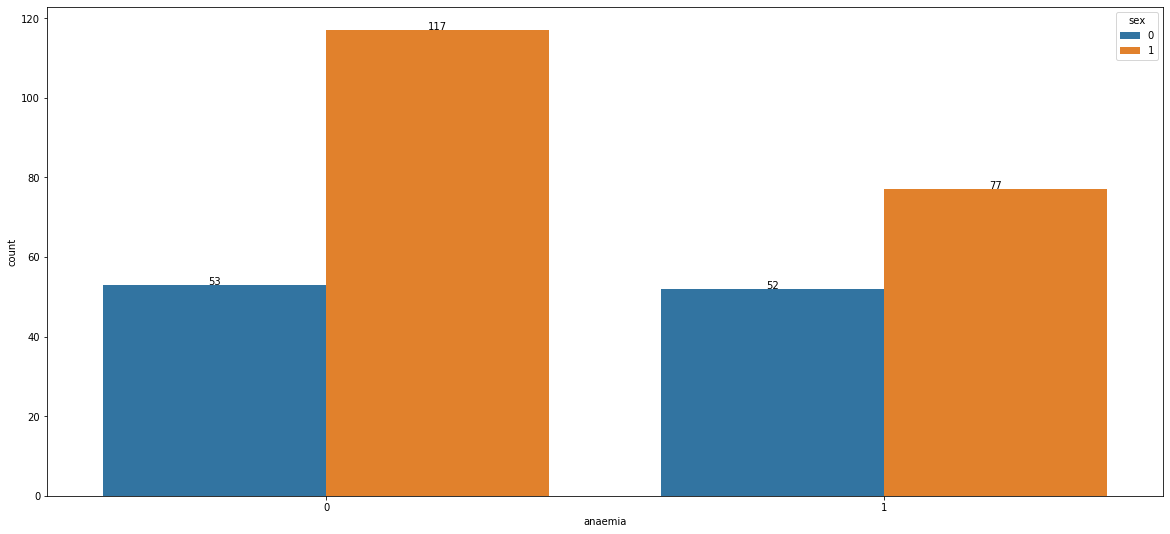

In [14]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_h['anaemia'], hue = df_h['sex'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

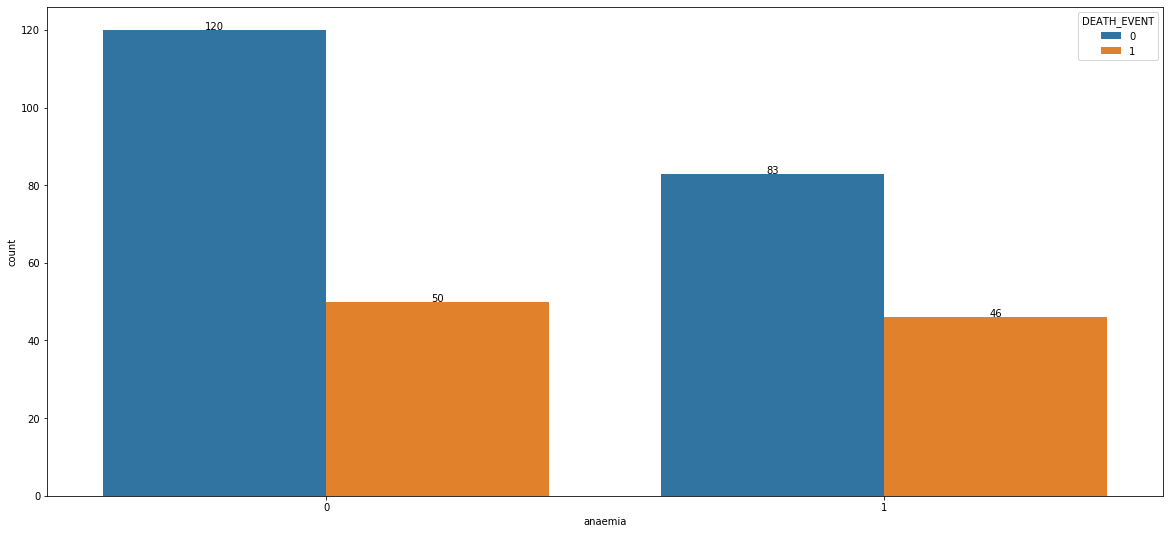

In [15]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_h['anaemia'], hue = df_h['DEATH_EVENT'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

### creatinine_phosphokinase

In [16]:
df_h['creatinine_phosphokinase'].value_counts()

582     47
66       4
129      4
84       3
231      3
        ..
395      1
754      1
2334     1
2695     1
514      1
Name: creatinine_phosphokinase, Length: 208, dtype: int64

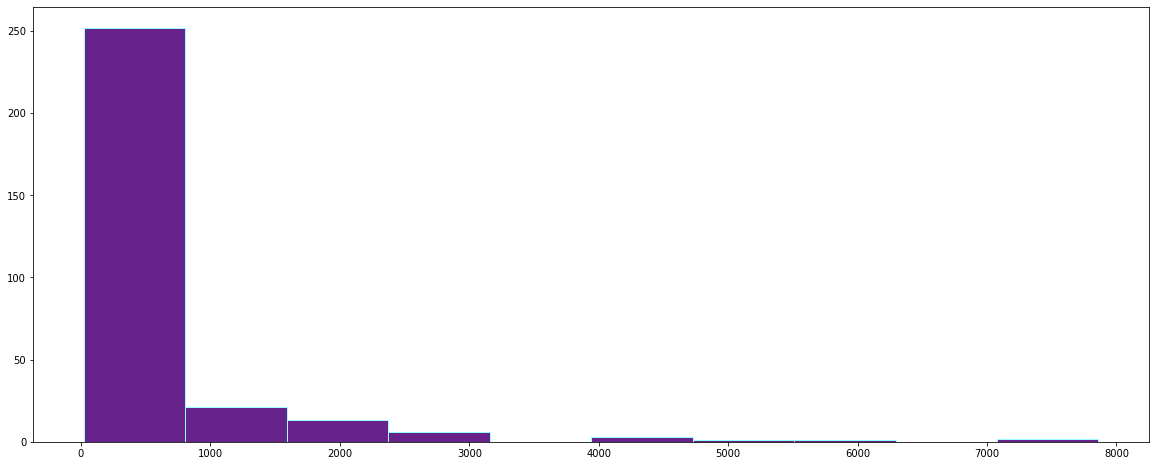

In [17]:
plt.figure(figsize=(20,8))
plt.hist(df_h['creatinine_phosphokinase'], color = "#68228B", edgecolor = '#97FFFF')
plt.show()

### diabetes

In [18]:
df_h['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

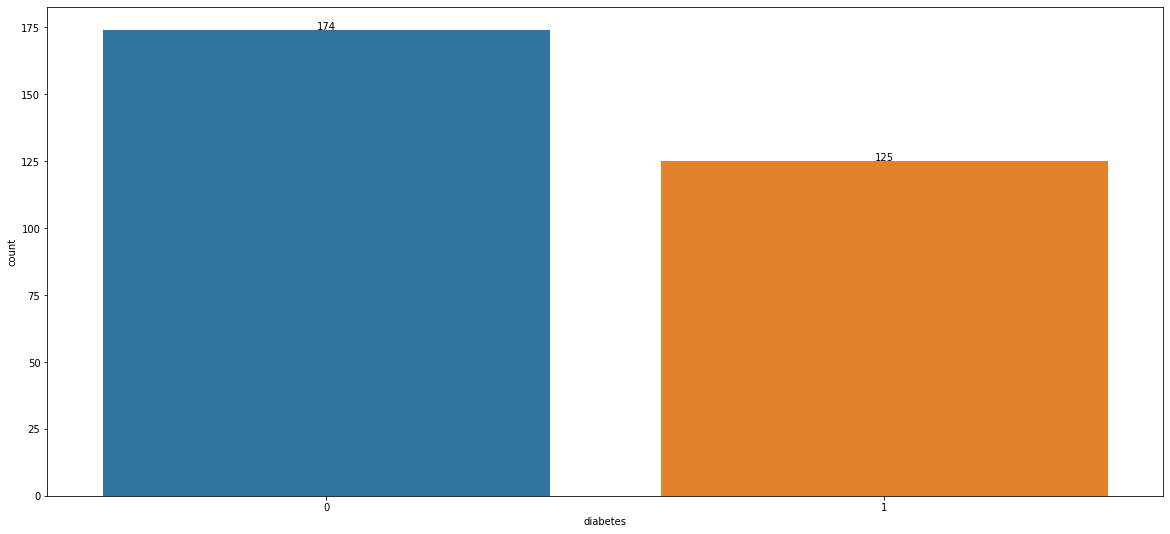

In [19]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_h['diabetes'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

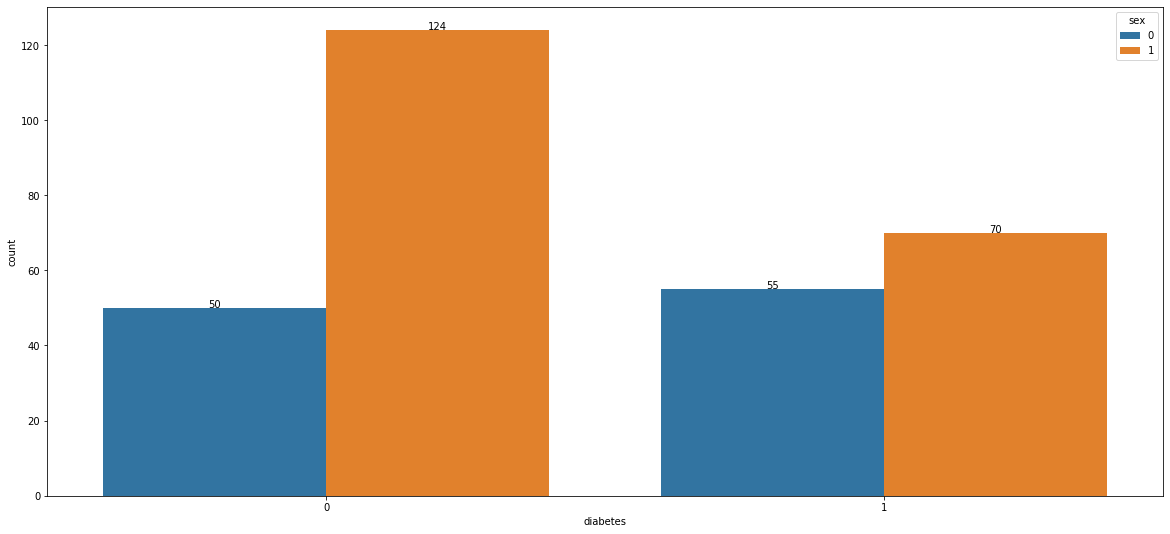

In [20]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_h['diabetes'], hue = df_h['sex'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

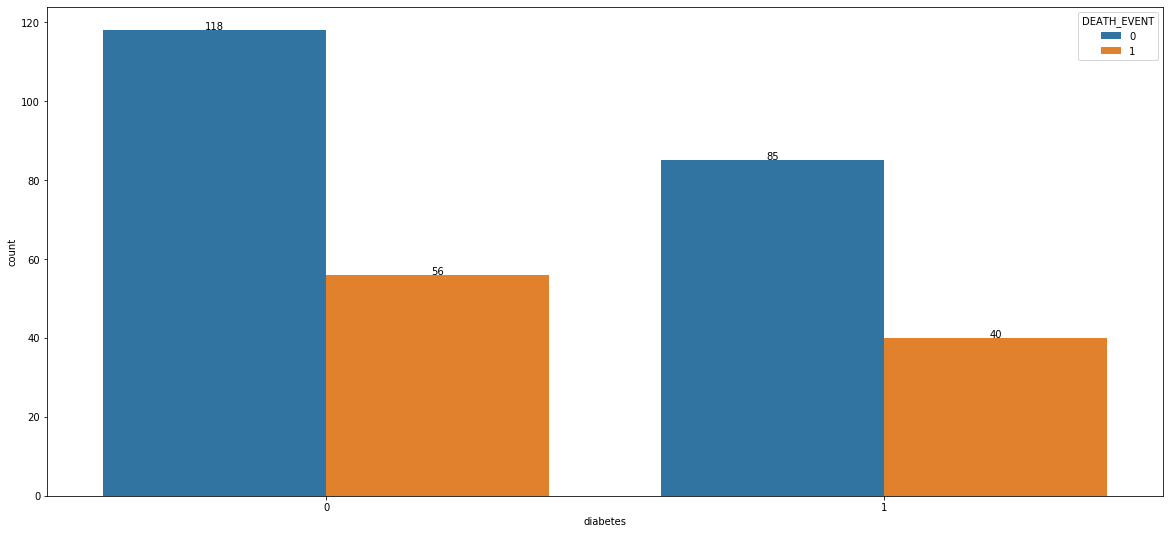

In [21]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_h['diabetes'], hue = df_h['DEATH_EVENT'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

### ejection_fraction

In [22]:
df_h['ejection_fraction']

0      20
1      38
2      20
3      20
4      20
       ..
294    38
295    38
296    60
297    38
298    45
Name: ejection_fraction, Length: 299, dtype: int64

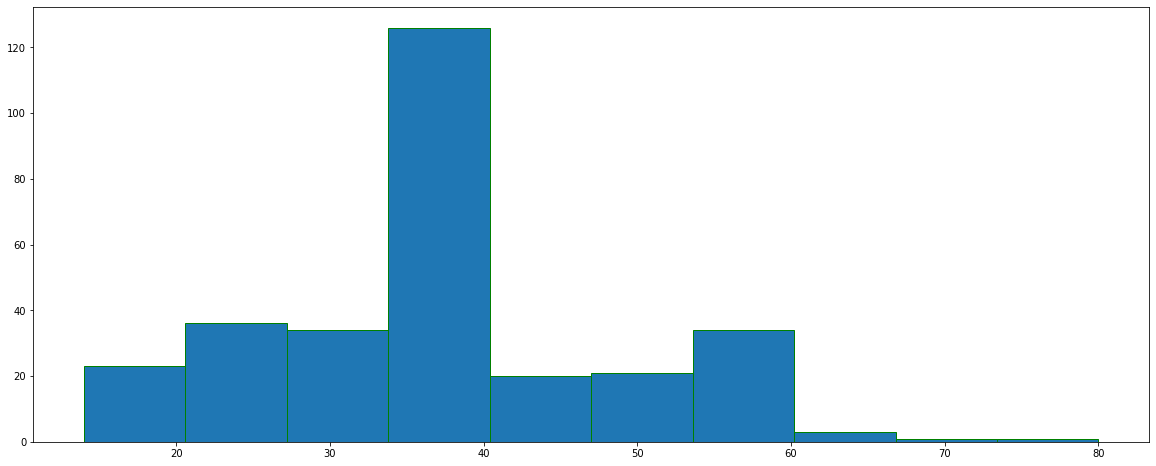

In [23]:
plt.figure(figsize=(20,8))
plt.hist(df_h['ejection_fraction'], edgecolor = 'green')
plt.show()

We see that most people are in the ejection_fraction range of 35-40.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


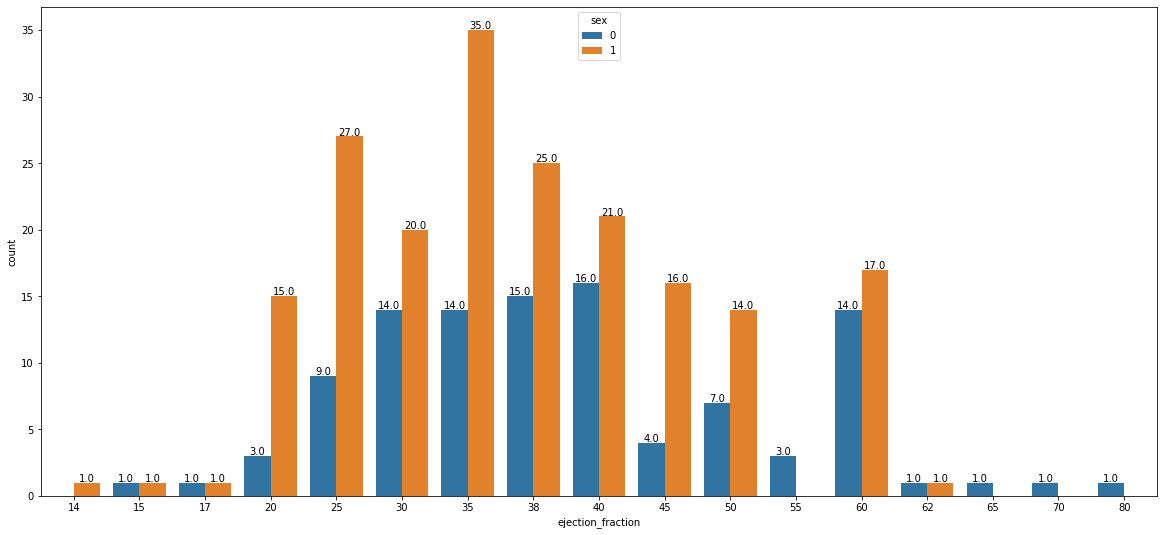

In [24]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_h['ejection_fraction'], hue = df_h['sex'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

### high_blood_pressure

In [25]:
df_h['high_blood_pressure']

0      1
1      0
2      0
3      0
4      0
      ..
294    1
295    0
296    0
297    0
298    0
Name: high_blood_pressure, Length: 299, dtype: int64

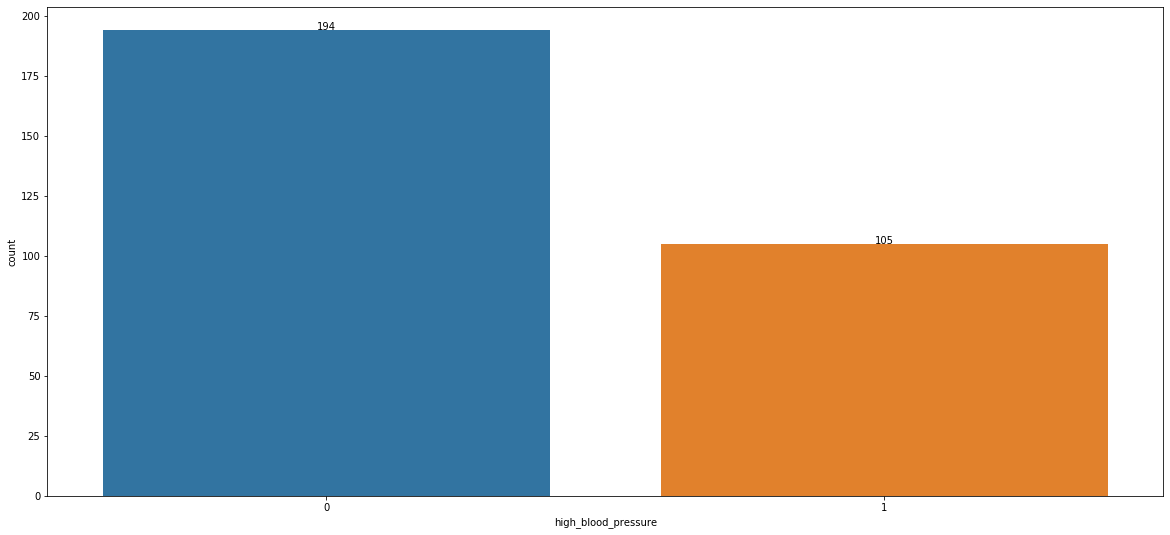

In [26]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_h['high_blood_pressure'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
plt.show()

We see that 105 people had high blood pressure

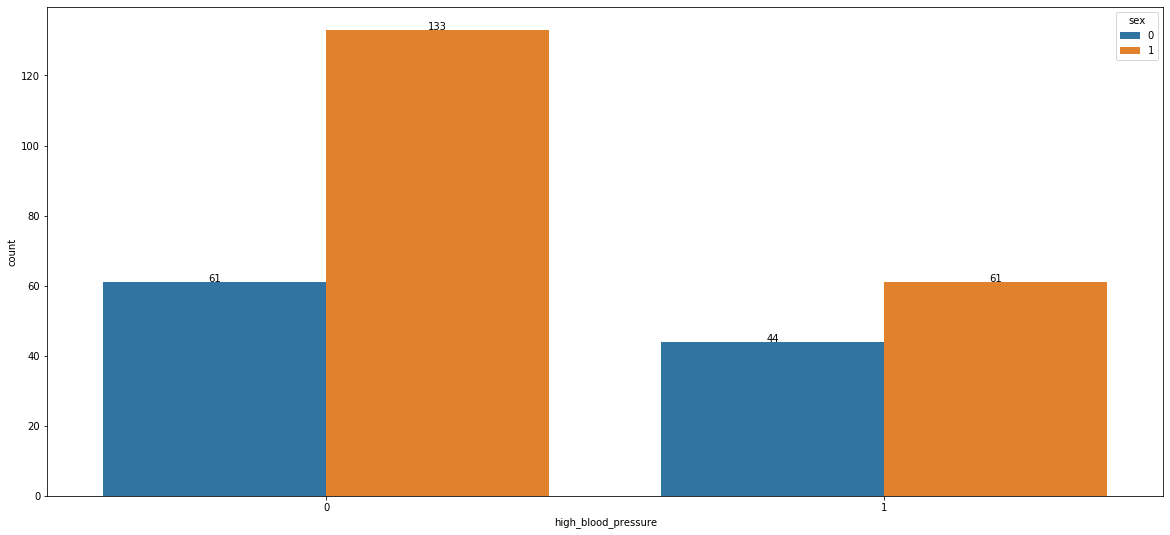

In [27]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_h['high_blood_pressure'], hue = df_h['sex'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
plt.show()

This chart shows the relation b/w high blood pressure and sex

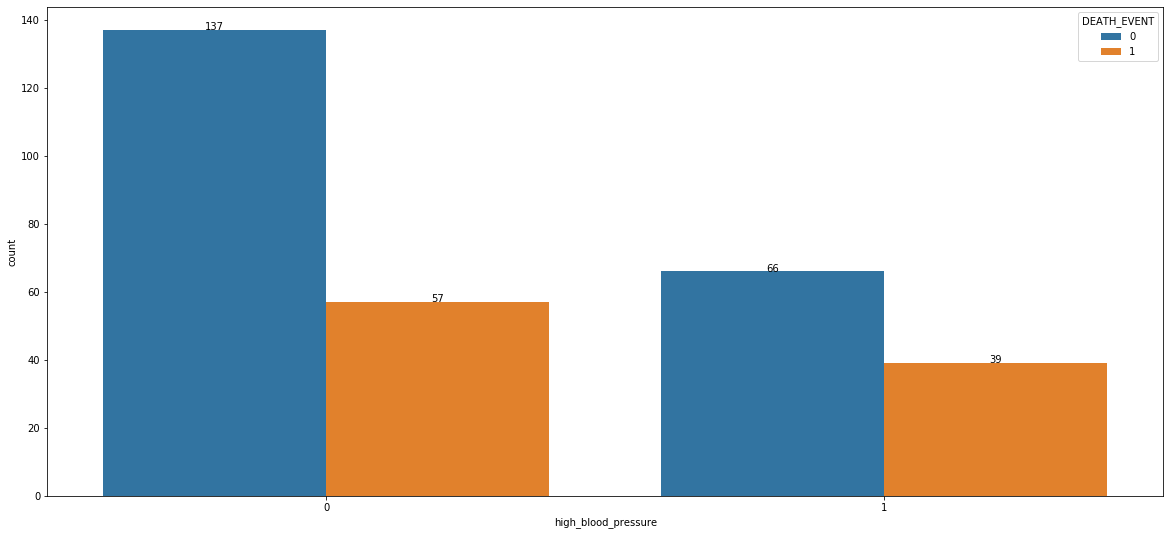

In [28]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_h['high_blood_pressure'], hue = df_h['DEATH_EVENT'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
plt.show()

This chart shows the relation b/w high blood pressure and DEATH EVENT

### serum_creatinine

In [29]:
df_h['serum_creatinine']

0      1.9
1      1.1
2      1.3
3      1.9
4      2.7
      ... 
294    1.1
295    1.2
296    0.8
297    1.4
298    1.6
Name: serum_creatinine, Length: 299, dtype: float64

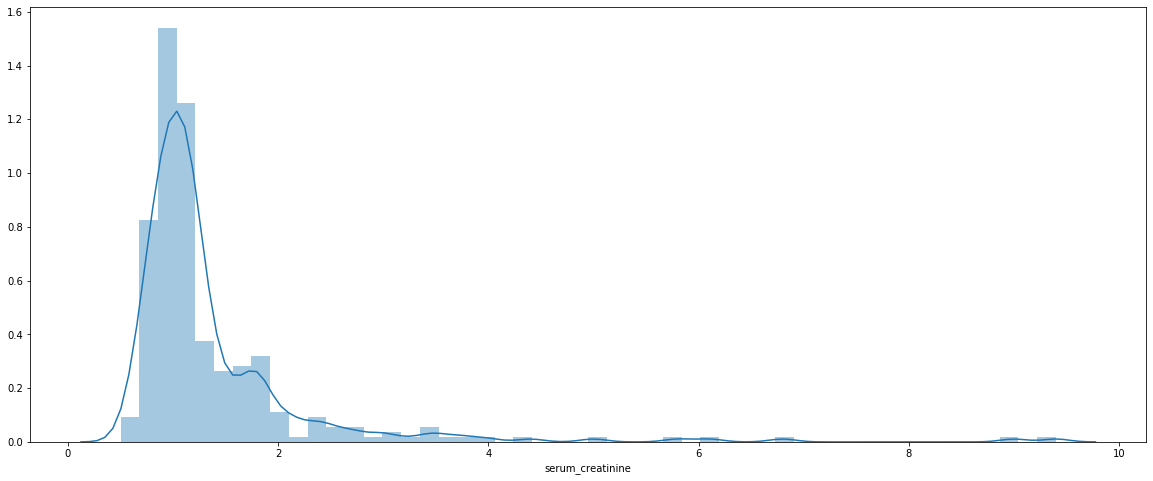

In [30]:
plt.figure(figsize=(20,8))
sns.distplot(df_h['serum_creatinine'])

### serum_sodium

In [31]:
df_h['serum_sodium'].value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
143     3
127     3
128     2
129     2
116     1
124     1
121     1
148     1
125     1
126     1
146     1
113     1
Name: serum_sodium, dtype: int64

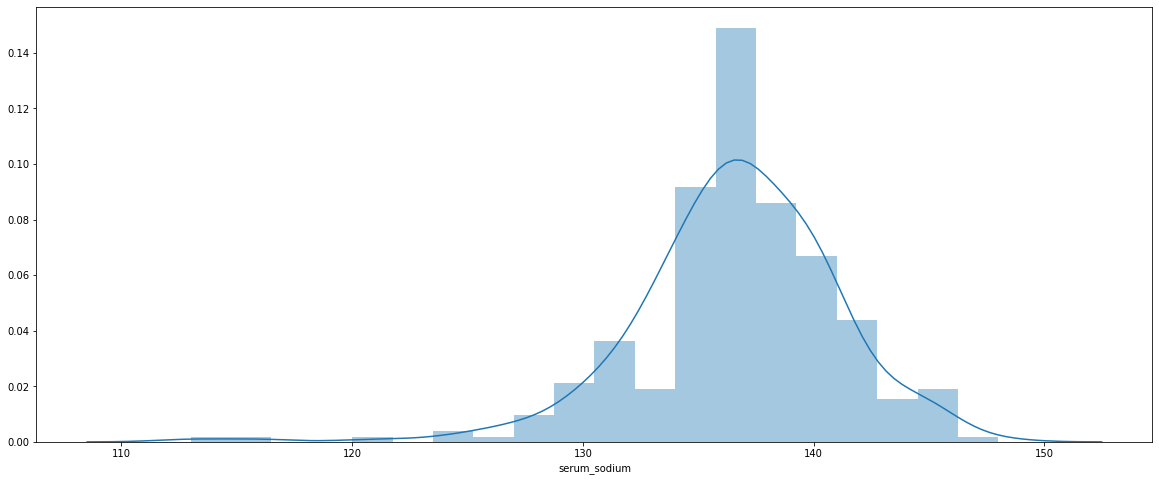

In [32]:
plt.figure(figsize=(20,8))
sns.distplot(df_h['serum_sodium'])

### sex

In [33]:
df_h['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

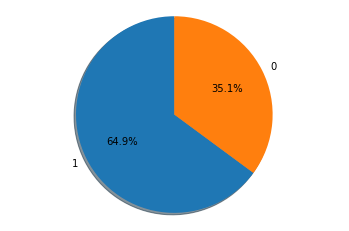

In [34]:
labels = df_h['sex'].value_counts().index.tolist()
sizes = df_h['sex'].value_counts()
fig, ax=plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

### smoking

In [35]:
df_h['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

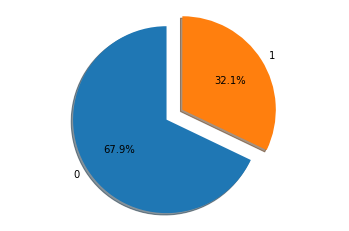

In [36]:
labels = df_h['smoking'].value_counts().index.tolist()
sizes = df_h['smoking'].value_counts()
fig, ax=plt.subplots()
explode = (0, 0.2)
ax.pie(sizes, explode = explode,labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

We see that 31.2% of the people used to smoke

### time

In [37]:
df_h['time'].value_counts()

187    7
250    7
186    6
107    6
10     6
      ..
135    1
140    1
148    1
150    1
4      1
Name: time, Length: 148, dtype: int64

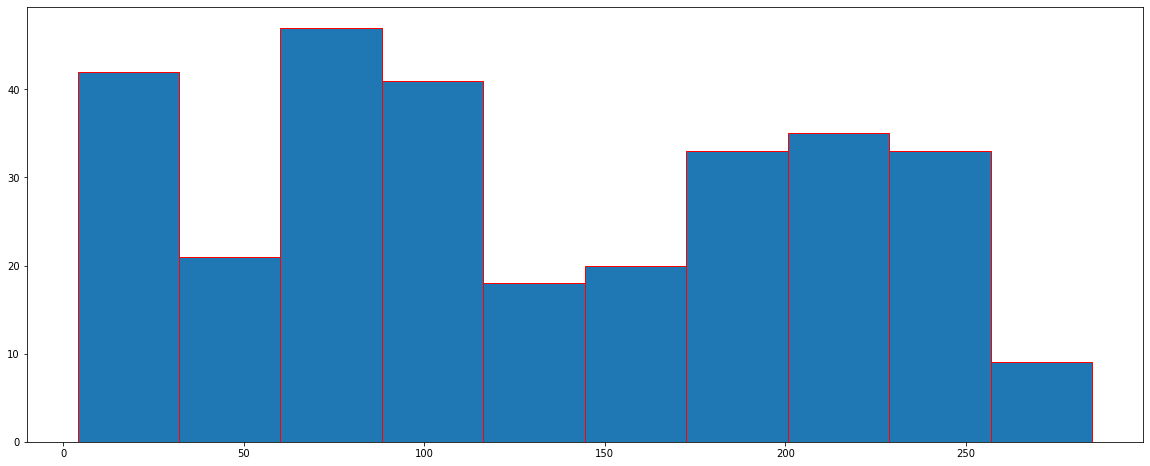

In [38]:
plt.figure(figsize = (20,8))
plt.hist(df_h['time'], edgecolor = 'red')
plt.show()

# Model Making

#### Before model making, see for outliers in your independent variables, so as to make changes or do more filteration

Text(0.5, 1.0, 'platelets')

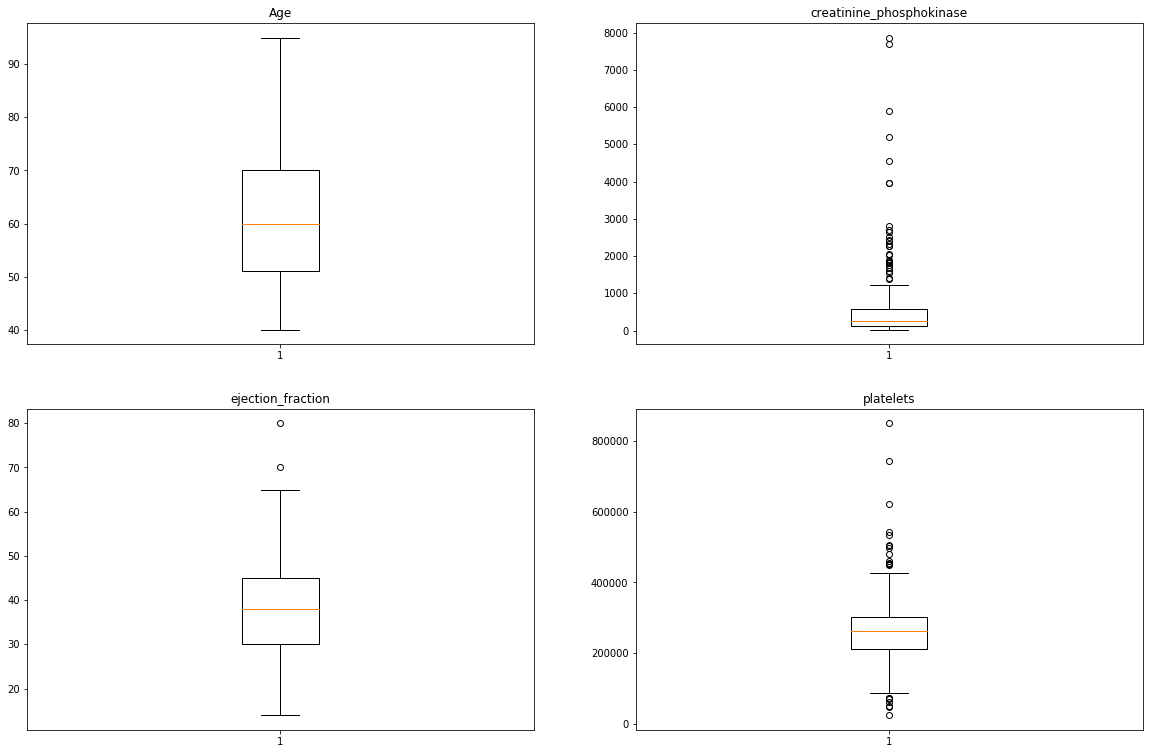

In [39]:
# age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time are the columns which we will use for predicting DEATH_EVENT.
# we will see for outliers
# subplot(nrows, ncols, index, **kwargs)
plt.figure(figsize=(20,13))
ax=plt.subplot(221)
plt.boxplot(df_h['age'])
plt.title('Age')
ax = plt.subplot(222)
plt.boxplot(df_h['creatinine_phosphokinase'])
plt.title('creatinine_phosphokinase')
ax = plt.subplot(223)
plt.boxplot(df_h['ejection_fraction'])
plt.title('ejection_fraction')
ax = plt.subplot(224)
plt.boxplot(df_h['platelets'])
plt.title('platelets')

Text(0.5, 1.0, 'time')

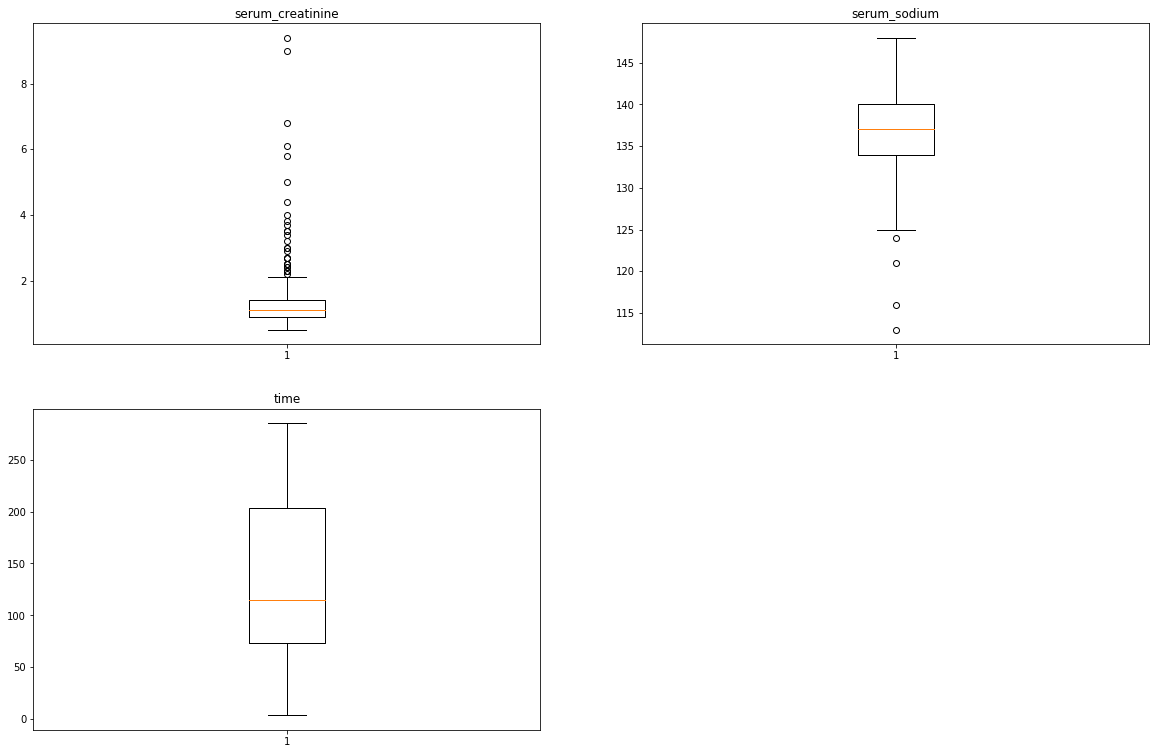

In [40]:
plt.figure(figsize=(20,13))
ax = plt.subplot(221)
plt.boxplot(df_h['serum_creatinine'])
plt.title('serum_creatinine')
ax = plt.subplot(222)
plt.boxplot(df_h['serum_sodium'])
plt.title('serum_sodium')
ax = plt.subplot(223)
plt.boxplot(df_h['time'])
plt.title('time')

ejection_fraction have very less outliers so we are gonna remove them, the rest which are having outliers, we are gonna replace them with their median.

In [41]:
df_h = df_h[df_h['ejection_fraction'] < 70]

In [42]:
df_h['creatinine_phosphokinase'] = np.where(df_h['creatinine_phosphokinase'] > df_h['creatinine_phosphokinase'].quantile(0.95), df_h['creatinine_phosphokinase'].quantile(0.50), df_h['creatinine_phosphokinase'])

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


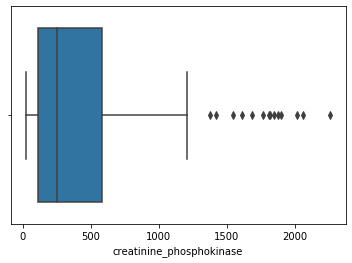

In [43]:
sns.boxplot(df_h['creatinine_phosphokinase'])

In [44]:
df_h['platelets'] = np.where(df_h['platelets'] > df_h['platelets'].quantile(0.95), df_h['platelets'].quantile(0.50), df_h['platelets'])

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


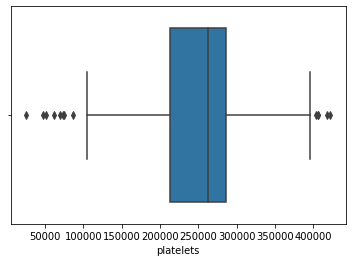

In [45]:
sns.boxplot(df_h['platelets'])

In [46]:
df_h['serum_creatinine'] = np.where(df_h['serum_creatinine'] > df_h['serum_creatinine'].quantile(0.95), df_h['serum_creatinine'].quantile(0.50), df_h['serum_creatinine'])

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


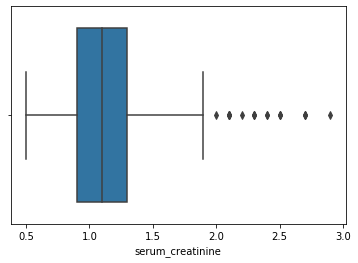

In [47]:
sns.boxplot(df_h['serum_creatinine'])

In [48]:
df_h['serum_sodium'] = np.where(df_h['serum_sodium'] > df_h['serum_sodium'].quantile(0.95), df_h['serum_sodium'].quantile(0.50), df_h['serum_sodium'])

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


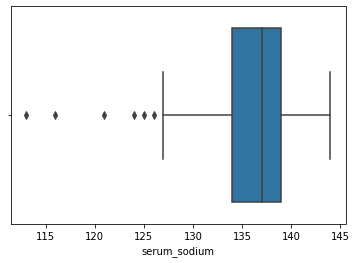

In [49]:
sns.boxplot(df_h['serum_sodium'])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df_h.loc[:, ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
y = df_h.loc[:, 'DEATH_EVENT']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [53]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()

In [56]:
model_lr = lr.fit(X_train, y_train)

In [57]:
y_lr_predict = model_lr.predict(X_test)

In [58]:
LR_df = pd.DataFrame(data = {"Actual": y_test, "Predicted": y_lr_predict})

In [59]:
LR_df

,Actual,Predicted
24,1,1
65,1,1
103,0,0
216,0,0
285,0,0
...,...,...
49,1,1
273,0,0
193,0,0
58,1,1


In [60]:
model_lr.score(X_test, y_test)

0.8

In [61]:
score_lr = accuracy_score(y_test, y_lr_predict)

In [62]:
score_lr

0.8

### Random Forest Classififer

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier()

In [65]:
model_rfr = rfc.fit(X_train, y_train)

In [66]:
y_rfr_predict = model_rfr.predict(X_test)

In [67]:
RFR_df = pd.DataFrame(data = {"Actual": y_test, "Predicted": y_rfr_predict})

In [68]:
RFR_df

,Actual,Predicted
24,1,1
65,1,1
103,0,0
216,0,0
285,0,0
...,...,...
49,1,1
273,0,0
193,0,0
58,1,1


In [69]:
model_rfr.score(X_test, y_test)

0.8666666666666667

In [70]:
score_rfr = accuracy_score(y_test, y_rfr_predict)

In [71]:
score_rfr

0.8666666666666667

### Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gnb = GaussianNB()

In [74]:
model_gnb = gnb.fit(X_train, y_train)

In [75]:
y_gnb_predict = model_gnb.predict(X_test)

In [76]:
GNB_df = pd.DataFrame(data = {"Actual":y_test, "Predicted": y_gnb_predict})

In [77]:
GNB_df

,Actual,Predicted
24,1,1
65,1,1
103,0,0
216,0,0
285,0,0
...,...,...
49,1,1
273,0,0
193,0,0
58,1,1


In [78]:
model_gnb.score(X_test, y_test)

0.8444444444444444

In [79]:
score_gnb = accuracy_score(y_test, y_gnb_predict)

In [80]:
score_gnb

0.8444444444444444

### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtc = DecisionTreeClassifier(random_state=42)

In [83]:
model_dtc = dtc.fit(X_train, y_train)

In [84]:
y_dtc_predit = model_dtc.predict(X_test)

In [85]:
DTC_df = pd.DataFrame(data = {'Actual': y_test, "Predicted": y_dtc_predit})

In [86]:
DTC_df

,Actual,Predicted
24,1,1
65,1,1
103,0,0
216,0,0
285,0,1
...,...,...
49,1,1
273,0,0
193,0,0
58,1,1


In [87]:
model_dtc.score(X_test, y_test)

0.7777777777777778

In [88]:
score_dtc = accuracy_score(y_test, y_dtc_predit)

In [89]:
score_dtc

0.7777777777777778

### Final Result

In [92]:
print("Logistic Regression accuracy: ", score_lr)
print("Random Forest Classifier accuracy: ", score_rfr)
print("Naive Bayes accuracy: ", score_gnb)
print("DecisionTreeClassifier accuracy", score_dtc)

Logistic Regression accuracy:  0.8
Random Forest Classifier accuracy:  0.8666666666666667
Naive Bayes accuracy:  0.8444444444444444
DecisionTreeClassifier accuracy 0.7777777777777778
